In [ ]:
!pip install geopandas

In [20]:
import geopandas as gpd
from shapely.geometry import Point, LineString, LinearRing, Polygon, MultiPoint, multilinestring, MultiPolygon
import numpy as np

## 実装機能
1. ポリゴンを生成する機能
2. ポリゴンを構成するポイントの数を増やす機能
3. ポリゴンの特定の点を拡大する機能
4. ポリゴンとラインの接触を判定する機能
5. ポリゴンの重なりを判定する機能



### ポリゴン生成

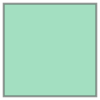

In [7]:
# 1. ポリゴン生成
t1 = Polygon([(0,0), (1,0), (1,1), (0,1)])
t1

### ポリゴンを構成するポイントの数を増やす機能
TODO.
- 間隔を均等にした方が良いか？

In [245]:
# 2. ポリゴンを構成するポイントの数を増やす機能
p_list = [[0,0], [1,0], [1,1], [0,1]]


def add_midpoints(points):
    new_points = []
    n = len(points)
    points = np.array(points)
    for i in range(n):
        # 現在のポイントと次のポイントの中点を計算
        current_point = points[i]
        next_point = points[(i + 1) % n]
        midpoint = (current_point + next_point) / 2

        # 中点を新しいポイントとして追加
        new_points.append(current_point.tolist())
        new_points.append(midpoint.tolist())

    return new_points

# 関数を実行↓
existing_points = np.array(p_list)
new_points = add_midpoints(existing_points) # 中点を追加した新しいポイントの生成

# 結果の表示
print("既存のポイント:", existing_points)
print("新しいポイント:", new_points)

既存のポイント: [[0 0]
 [1 0]
 [1 1]
 [0 1]]
新しいポイント: [[0, 0], [0.5, 0.0], [1, 0], [1.0, 0.5], [1, 1], [0.5, 1.0], [0, 1], [0.0, 0.5]]


In [ ]:
# 指数関数的に増やすことができる
for i in range(10):
    p_list = add_midpoints(p_list)
    print(p_list)

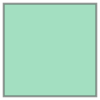

In [42]:
Polygon(p_list)

### ポリゴンの特定の点を拡張する機能

In [101]:
p_list = [[0,0], [1,0], [1,1], [0,1]]
np_list = np.array(p_list)
n = len(np_list)
centroid = np.sum(np_list, axis=0) / n
p1v = np_list[2]
v = p1v - centroid
p_list[2] = list(3 * v)
np_list = np.array(p_list)

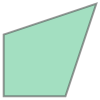

In [102]:
Polygon(np_list)

### 4. ポリゴンとラインの接触を判定する機能

In [116]:
# ポリゴンがポイントを内包しているパターン　-> Trueとなる
# 境界線上もTrueとなる

from shapely.geometry import Point, Polygon

# ポリゴンの座標を定義
polygon_coords = np.array([[0, 0], [0, 1], [1, 1], [1, 0]])
# ポリゴンのオブジェクトを作成
polygon = Polygon(polygon_coords).boundary # .boundaryでポイントとの比較対象をポリゴンか輪郭ラインか制御できる
# 判定するポイントを作成
point = Point(0, 0.235)
# ポリゴンとポイントの接触判定
intersects = polygon.intersects(point)
# 結果の表示
print("ポイントとポリゴンが接触しているか:", intersects)

ポイントとポリゴンが接触しているか: True


In [113]:
# ラインの座標が存在しない部分でも判定はTrueとなる

from shapely.geometry import Point, LineString
# ラインの座標を定義
line_coords = [(0, 0), (1, 1), (2, 0)]
# ラインのオブジェクトを作成
line = LineString(line_coords)
# 判定するポイントを作成
point = Point(0.5, 0.5)
# ラインとポイントの接触判定
intersects = line.intersects(point)
# 結果の表示
print("ポイントとラインが接触しているか:", intersects)

ポイントとラインが接触しているか: True


### 5. ポリゴンの重なりを判定する機能

In [137]:
from shapely.geometry import Polygon

# 判定する2つのポリゴンの座標を定義
polygon1_coords = [(0, 0), (0, 1), (0.4, 1), (0.4, 0)]
polygon2_coords = [(0.5, 0.5), (0.5, 1.5), (1.5, 1.5), (1.5, 0.5)]

# ポリゴンのオブジェクトを作成
polygon1 = Polygon(polygon1_coords)
polygon2 = Polygon(polygon2_coords)

# ポリゴンの重なり判定
overlap = polygon1.intersects(polygon2)

# 結果の表示
print("ポリゴンの重なり判定結果:", overlap)

gdf = gpd.GeoDataFrame([polygon1, polygon2]).reset_index(drop=False)
gdf = gpd.GeoDataFrame(gdf, geometry=0)

ポリゴンの重なり判定結果: False


In [138]:
gdf

,index,0
0,0,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 0...."
1,1,"POLYGON ((0.50000 0.50000, 0.50000 1.50000, 1...."


<Axes: >

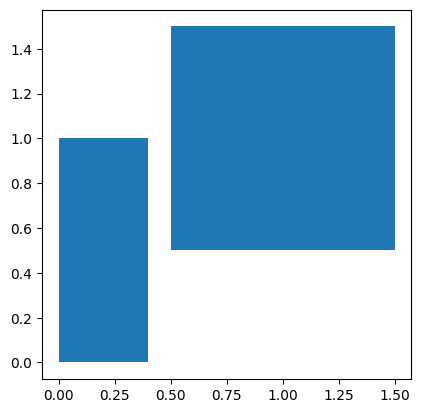

In [139]:
gdf.plot()

## 組み合わせる


### 最適な拡大率からポリゴン作る

In [267]:
def get_best_ratio(polygon, centroid, i, intersects_polygon, intersects_line, v):

    # 拡大率の初期値
    ratio = 1.0
    if intersects_polygon==True and intersects_line==False:
        while intersects_polygon==True and intersects_line==False:
            t1[i] = list(ratio * v) + centroid
            # 判定するポイントを作成
            point = Point(t1[i])
            # ポリゴンとポイントの接触判定
            intersects_polygon = waku_polygon.intersects(point)
            # print("ポイントとポリゴンが接触しているか:", intersects_polygon)
            # ラインとポイントの接触判定
            intersects_line = line.intersects(point)
            # print("ポイントとラインが接触しているか:", intersects_line)
            ratio += 0.01

        while intersects_polygon==False and intersects_line==False:
            t1[i] = list(ratio * v) + centroid
            # 判定するポイントを作成
            point = Point(t1[i])
            # ポリゴンとポイントの接触判定
            intersects_polygon = waku_polygon.intersects(point)
            # print("ポイントとポリゴンが接触しているか:", intersects_polygon)
            # ラインとポイントの接触判定
            intersects_line = line.intersects(point)
            # print("ポイントとラインが接触しているか:", intersects_line)
            ratio -= 0.001

    # print("最適な拡大率：", ratio)
    return t1

1024


<Axes: >

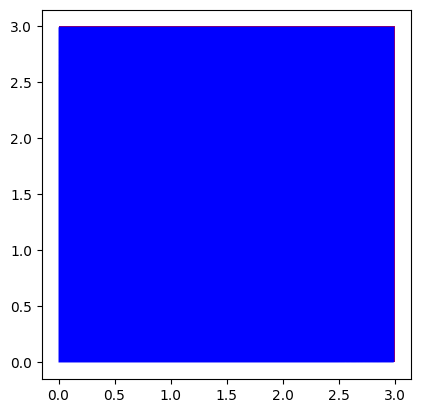

In [268]:
# 枠と対象物の初期値を設定
waku = [[0,0], [3,0], [3,3], [0,3]]
waku_np = np.array(waku)
waku_polygon = Polygon(waku_np)
waku_boundary = waku_polygon.boundary
t1 = [[1,1], [1.5, 1], [1.5, 1.5], [1, 1.5]]
t1_np = np.array(t1)
# 点を増やす
for t in range(8):
    t1 = add_midpoints(t1)  # 中点を追加した新しいポイントの生成
t1_np = np.array(t1)
n = len(t1_np) # ポイント数
print(n)
centroid = np.sum(t1_np, axis=0) / n
t1_polygon = Polygon(t1_np)

# 点の数だけ繰り返す

for i in range(n):
    p1v = t1_np[i]
    v = p1v - centroid
    # 条件一致するまで拡大率を操作し、最適化する
    # 初期値を確認
    point = Point(t1_np[i])
    # ポリゴンとポイントの接触判定
    intersects_polygon = waku_polygon.intersects(point)
    intersects_line = waku_boundary.intersects(point)
    # print(intersects_polygon, intersects_line)
    t1 = get_best_ratio(polygon=t1, centroid=centroid, i=i, intersects_polygon=intersects_polygon, intersects_line=intersects_line, v=v)

t1_polygon = Polygon(np.array(t1))
gdf = gpd.GeoDataFrame({"geometry":[waku_polygon, t1_polygon]}, geometry="geometry")

colors = ["red", "blue"]
gdf.plot(color=colors)

### その2：点ごとではなく、イテレーションごとにすべての点を拡大する

In [277]:
# 枠と対象物の初期値を設定
waku = [[0,0], [3,0], [3,3], [0,3]]
waku_np = np.array(waku)
waku_polygon = Polygon(waku_np)
waku_boundary = waku_polygon.boundary
t1 = [[1,1], [1.5, 1], [1.5, 1.5], [1, 1.5]]
t1_np = np.array(t1)
# 点を増やす
# for t in range(8):
#     t1 = add_midpoints(t1)  # 中点を追加した新しいポイントの生成
# t1_np = np.array(t1)
n = len(t1_np) # ポイント数
print(n)
centroid = np.sum(t1_np, axis=0) / n
t1_polygon = Polygon(t1_np)

4


[[1, 1], [1.5, 1], [1.5, 1.5], [1, 1.5]]


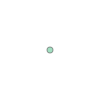

In [286]:
print(t1) # これを消していく
# ポリゴンを構成する点のリストを作成して、枠か、他のポリゴンに接したらリストから除く

In [ ]:




for i in range(n):
    p1v = t1_np[i]
    v = p1v - centroid
    # 条件一致するまで拡大率を操作し、最適化する
    # 初期値を確認
    point = Point(t1_np[i])
    # ポリゴンとポイントの接触判定
    intersects_polygon = waku_polygon.intersects(point)
    intersects_line = waku_boundary.intersects(point)
    # print(intersects_polygon, intersects_line)
    t1 = get_best_ratio(polygon=t1, centroid=centroid, i=i, intersects_polygon=intersects_polygon, intersects_line=intersects_line, v=v)

t1_polygon = Polygon(np.array(t1))
gdf = gpd.GeoDataFrame({"geometry":[waku_polygon, t1_polygon]}, geometry="geometry")

colors = ["red", "blue"]
gdf.plot(color=colors)

<Axes: >

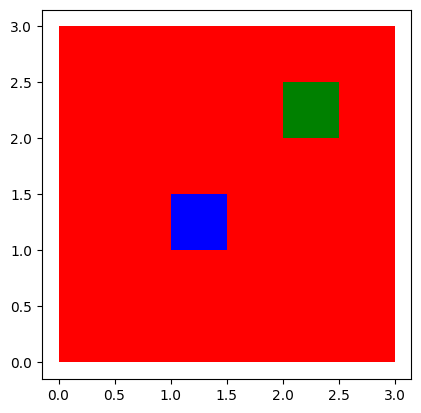

In [273]:
## 複数ポリゴン
# 枠と対象物の初期値を設定
waku = [[0,0], [3,0], [3,3], [0,3]]
waku_np = np.array(waku)
waku_polygon = Polygon(waku_np)
waku_boundary = waku_polygon.boundary

t1 = [[1,1], [1.5, 1], [1.5, 1.5], [1, 1.5]]
t1_polygon = Polygon(np.array(t1))
t2 = [[2,2], [2.5, 2], [2.5, 2.5], [2, 2.5]]
t2_polygon = Polygon(np.array(t2))
gdf = gpd.GeoDataFrame({"geometry":[waku_polygon, t1_polygon, t2_polygon]}, geometry="geometry")
colors = ["red", "blue", "green"]
gdf.plot(color=colors)

In [274]:
gdf

,geometry
0,"POLYGON ((0.00000 0.00000, 3.00000 0.00000, 3...."
1,"POLYGON ((1.00000 1.00000, 1.50000 1.00000, 1...."
2,"POLYGON ((2.00000 2.00000, 2.50000 2.00000, 2...."
